# Tutorial for one-photon imaging dataset.

This tutorial shows how to access the *Two Photon dataset* using `pynwb`. 

This dataset contains the 2-photon calcium imaging holographic stimulation data and visual stimuli events.

Contents:

- [Reading an NWB file](#read-nwb)
- [Access subject and task metadata](#access-subject)
- [Access Dual-color Mesoscopic Imaging](#access-imaging)
- [Access TTL Signals](#ttl-signals)
- [Access Wheel Signal](#wheel-signal)
- [Access Raw Behavior](#raw-behavior)
- [Access Processed Behavior](#processed-behavior)
- [Access Visual Stimulus](#access-visualstim)

<!-- A schematic representation where the source data is saved in NWB:

![Alt text](./conversion_outline_diagram.png) -->

# Reading an NWB file <a name="read-nwb"></a>

This section demonstrates how to read an NWB file using `pynwb`.

Based on the [NWB File Basics](https://pynwb.readthedocs.io/en/stable/tutorials/general/plot_file.html#sphx-glr-tutorials-general-plot-file-py) tutorial from [PyNWB](https://pynwb.readthedocs.io/en/stable/#).

An [NWBFile](https://pynwb.readthedocs.io/en/stable/pynwb.file.html#pynwb.file.NWBFile) represents a single session of an experiment. Each NWBFile must have a `session description`, `identifier`, and `session start time`.

Reading is carried out using the [NWBHDF5IO](https://pynwb.readthedocs.io/en/stable/pynwb.html#pynwb.NWBHDF5IO) class. To read the NWB file use the read mode ("r") to retrieve an NWBFile object.


In [1]:
from pynwb import NWBHDF5IO
from pathlib import Path

# Choose which epoch to explore
session_id = '11222019_grabAM06_vis_stim'

# The file path to a .nwb file
root_path = Path("/media/amtra/Samsung_T5/CN_data")
output_dir_path = root_path / "Higley-conversion_nwb/nwb_stub/"
nwbfile_path = output_dir_path / f"{session_id}.nwb"
io = NWBHDF5IO(path=nwbfile_path, mode="r", load_namespaces=True)
nwbfile = io.read()

nwbfile

root pynwb.file.NWBFile at 0x140291029100864
Fields:
  acquisition: {
    OnePhotonSeriesBlueExcitationGreenChannel <class 'pynwb.ophys.OnePhotonSeries'>,
    OnePhotonSeriesGreenExcitationRedChannel <class 'pynwb.ophys.OnePhotonSeries'>,
    OnePhotonSeriesVioletExcitationGreenChannel <class 'pynwb.ophys.OnePhotonSeries'>,
    TTLTypesTable <class 'abc.TtlTypesTable'>,
    TTLsTable <class 'abc.TtlsTable'>,
    Video: 11222019_grabAM06_visual_stim <class 'pynwb.image.ImageSeries'>,
    WheelSignal <class 'pynwb.base.TimeSeries'>
  }
  devices: {
    OnePhotonMicroscope <class 'pynwb.device.Device'>
  }
  experiment_description: Dual-color mesoscopic imaging of both ACh and calcium across the neocortex of awake mice to investigate their relationships with behavioral variables. We find that higher arousal, categorized by diferent motor behaviors, is associated with spatiotemporally dynamic patterns of cholinergic modulation and enhanced large-scale network correlations. Overall, our fndings demonstrate that ACh provides a highly dynamic and spatially heterogeneous signal that links fuctuations in behavior to functional reorganization of cortical networks.
  experimenter: ['Moberly, Andrew']
  file_create_date: [datetime.datetime(2024, 6, 17, 10, 25, 50, 40680, tzinfo=datetime.timezone(datetime.timedelta(seconds=7200)))]
  identifier: 5ca5348d-76d9-492d-b80a-f96db2f86ec1
  imaging_planes: {
    ImagingPlaneBlueExcitationGreenChannel <class 'pynwb.ophys.ImagingPlane'>,
    ImagingPlaneGreenExcitationRedChannel <class 'pynwb.ophys.ImagingPlane'>,
    ImagingPlaneVioletExcitationGreenChannel <class 'pynwb.ophys.ImagingPlane'>
  }
  institution: Yale University School of Medicine
  intervals: {
    VisualStimulus <class 'pynwb.epoch.TimeIntervals'>
  }
  keywords: <StrDataset for HDF5 dataset "keywords": shape (4,), type "|O">
  lab: Higley
  processing: {
    behavior <class 'pynwb.base.ProcessingModule'>
  }
  related_publications: ['https://www.nature.com/articles/s41593-022-01202-6'
 'https://github.com/cardin-higley-lab/Lohani_Moberly_et_al_2022']
  session_description: Dual-color mesoscopic imaging of both ACh and calcium across the neocortex of awake mice. All imaging was performed during the second half of the light cycle in awake, behaving mice that were head-fixed so that they could freely run on a cylindrical wheel. Small (20° diameter) sinusoidal drifting gratings (2 Hz, 0.04 cycles per degree, 100% contrast) were generated using Psychtoolbox in MATLAB and presented on an LCD monitor at a distance of 20 cm. Stimuli were presented for 1-2 s. Air-puff stimuli were delivered using a thin metal tube aimed at the fur along the back and coupled to a solenoid valve (Clark Solutions) that delivered brief (200-ms) puffs of compressed air.
  session_id: 11222019_grabAM06_vis_stim
  session_start_time: 2019-11-23 00:11:40-05:00
  source_script: Created using NeuroConv v0.4.11
  source_script_file_name: /home/amtra/miniconda3/envs/higley_lab_to_nwb_env/lib/python3.9/site-packages/neuroconv/basedatainterface.py
  subject: subject pynwb.file.Subject at 0x140291032186736
Fields:
  age: P1W2D
  age__reference: birth
  sex: M
  species: Mus musculus
  strain: C57BL/6J
  subject_id: grabAM06

  surgery: All surgical implantation procedures were performed on adult mice (>P50). Mice were anesthetized using 1-2% isoflurane and maintained at 37 °C for the duration of the surgery. The skin and fascia above the skull were removed from the nasal bone to the posterior of the intraparietal bone and laterally between the temporal muscles. The surface of the skull was thoroughly cleaned with saline, and the edges of the incision were secured to the skull with Vetbond. A custom titanium headpost was secured to the posterior of the nasal bone with trans-parent dental cement (Metabond, Parkell), and a thin layer of dental cement was applied to the entire dorsal surface of the skull. Next, alayer of cyanoacrylate (Maxi-Cure, Bob Smith Industries) was us

Importantly, the `session start time` is the reference time for all timestamps in the file. For instance, an event with a timestamp of 0 in the file means the event occurred exactly at the session start time.

The `session_start_time` is extracted from the ScanImage metadata (`epoch`) of the first .tiff of the epoch.

In [2]:
nwbfile.session_start_time

datetime.datetime(2019, 11, 23, 0, 11, 40, tzinfo=datetime.timezone(datetime.timedelta(days=-1, seconds=68400)))

# Access subject metadata <a name="access-subject"></a>

This section demonstrates how to access the [Subject](https://pynwb.readthedocs.io/en/stable/pynwb.file.html#pynwb.file.Subject) field in an NWB file.

The [Subject](https://pynwb.readthedocs.io/en/stable/pynwb.file.html#pynwb.file.Subject) field can be accessed as `nwbfile.subject`.


In [3]:
nwbfile.subject

subject pynwb.file.Subject at 0x140291032186736
Fields:
  age: P1W2D
  age__reference: birth
  sex: M
  species: Mus musculus
  strain: C57BL/6J
  subject_id: grabAM06

# Access Dual-color Mesoscopic Imaging <a name="access-imaging"></a>

This section demonstraces how to access the raw One Photon imaging data.

`NWB` organizes data into different groups depending on the type of data. Groups can be thought of as folders within the file. Here are some of the groups within an NWBFile and the types of data they are intended to store:

- `acquisition`: raw, acquired data that should never change
- `processing`: processed data, typically the results of preprocessing algorithms and could change

## Raw OnePhoton Imaging

The raw OnePhoton imaging data is stored in `pynwb.ophys.OnePhotonSeries` objects (for each channel and excitation type separately) which is added to `nwbfile.acquisition`. The data can be accessed as `nwbfile.acquisition['OnePhotonSeries_color_Excitation_color_Channel']`.

The data in [OnePhotonSeries](https://pynwb.readthedocs.io/en/stable/pynwb.ophys.html#pynwb.ophys.OnePhotonSeries) is stored as a three dimensional array: the first dimension is time (frame), the second and third dimensions represent x and y (width by height). 

In [4]:
names_of_photon_series = nwbfile.acquisition.keys()
_ = [print(name) for name in names_of_photon_series if "OnePhotonSeries" in name ]

OnePhotonSeriesBlueExcitationGreenChannel
OnePhotonSeriesGreenExcitationRedChannel
OnePhotonSeriesVioletExcitationGreenChannel


In [5]:
photon_series_blue_ex = nwbfile.acquisition[f"OnePhotonSeriesBlueExcitationGreenChannel"]
print(f"Rate: {photon_series_blue_ex.rate}")
print(f"Starting Time: {photon_series_blue_ex.starting_time}")
photon_series_blue_ex.imaging_plane


Rate: 10.000000000000036
Starting Time: 10.0512


In [7]:
photon_series_violet_ex = nwbfile.acquisition[f"OnePhotonSeriesVioletExcitationGreenChannel"]
print(f"Rate: {photon_series_violet_ex.rate}")
print(f"Starting Time: {photon_series_violet_ex.starting_time}")
photon_series_violet_ex.imaging_plane

Rate: 10.000000000000036
Starting Time: 10.083219999999999


Text(0.5, 1.0, '395.0 Excitation')

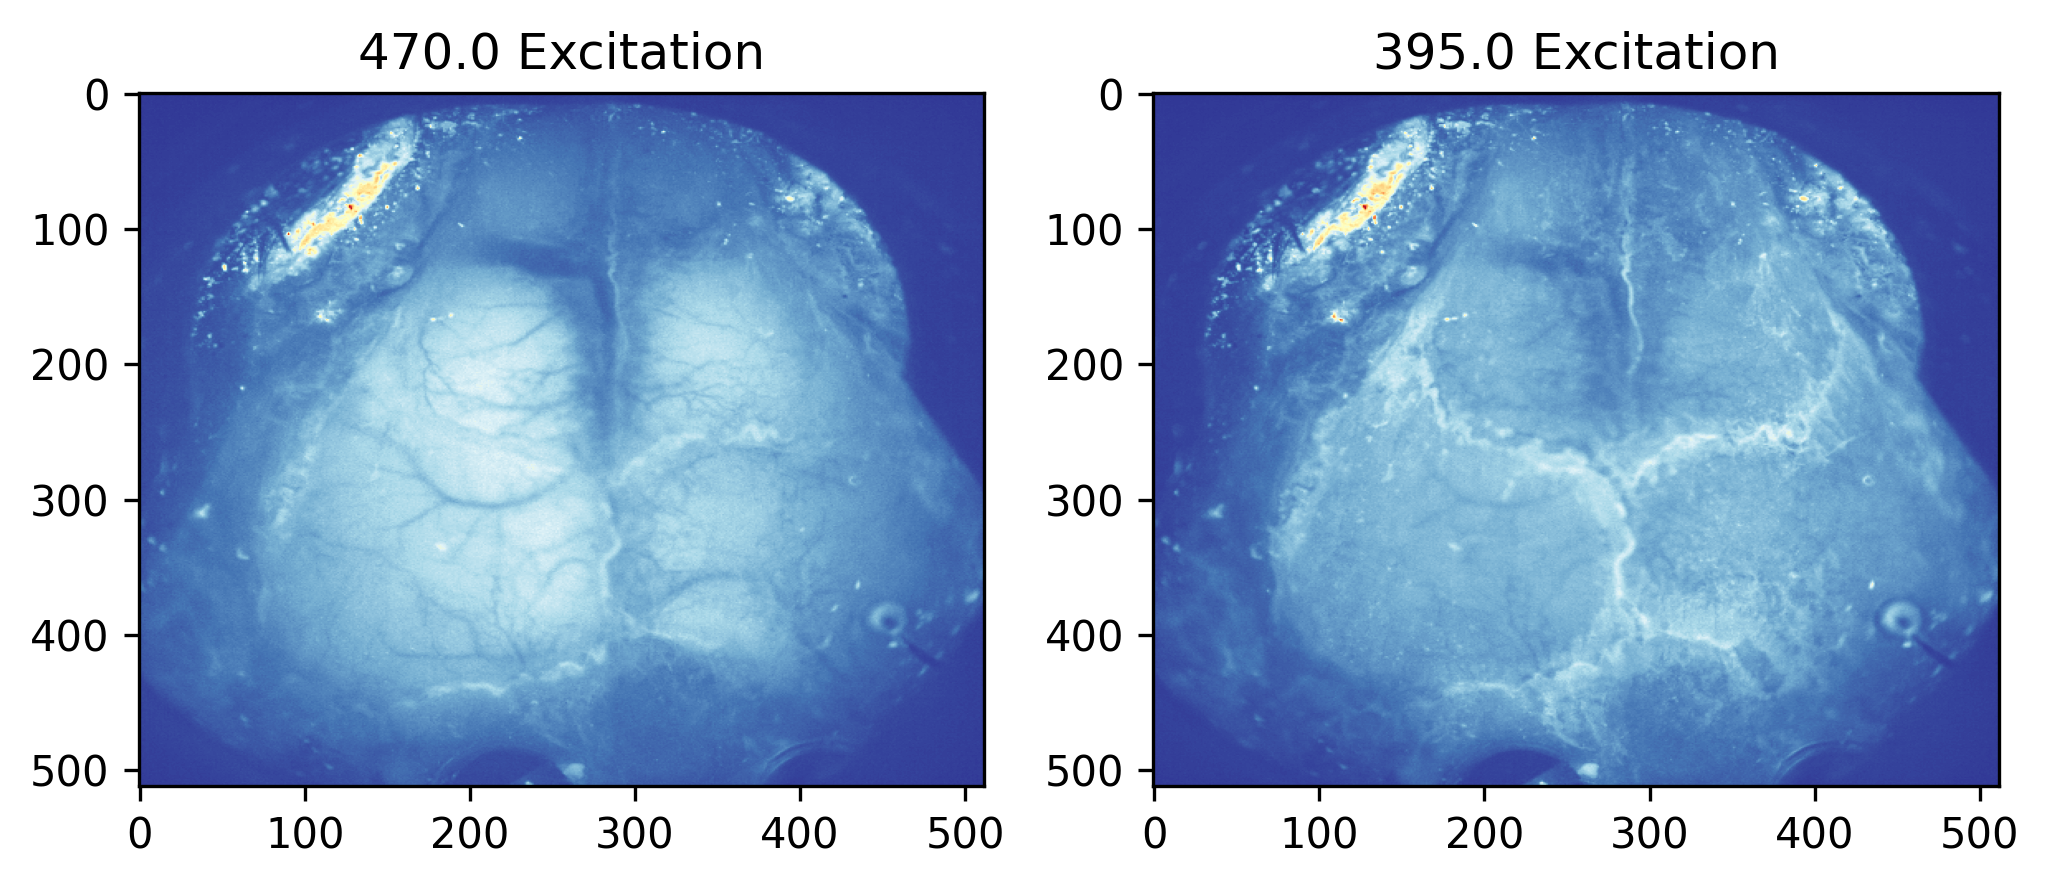

In [26]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 3), dpi=300)

ax[0].imshow(photon_series_blue_ex.data[10], aspect="auto", cmap="RdYlBu_r")
ax[0].set_title(f"{photon_series_blue_ex.imaging_plane.excitation_lambda} Excitation")

ax[1].imshow(photon_series_violet_ex.data[10], aspect="auto", cmap="RdYlBu_r")
ax[1].set_title(f"{photon_series_violet_ex.imaging_plane.excitation_lambda} Excitation")

In [30]:
photon_series_green_ex = nwbfile.acquisition[f"OnePhotonSeriesGreenExcitationRedChannel"]
print(f"Rate: {photon_series_green_ex.rate}")
print(f"Starting Time: {photon_series_green_ex.starting_time}")
photon_series_green_ex.imaging_plane

Rate: 10.000000000000036
Starting Time: 10.11516


ImagingPlaneGreenExcitationRedChannel pynwb.ophys.ImagingPlane at 0x140291028996640
Fields:
  conversion: 1.0
  description: Imaging plane for the Red channel recorded with Green excitation.
  device: OnePhotonMicroscope pynwb.device.Device at 0x140291031286688
Fields:
  description: Camera Type: DUAL_DCAM, Camera Name: C13440-20C S/N: 301751 S/N: 300073
  manufacturer: Hamamatsu Inc.

  excitation_lambda: 575.0
  grid_spacing_unit: meters
  indicator: jRCaMP1b
  location: Whole Brain
  optical_channel: (
    Red <class 'pynwb.ophys.OpticalChannel'>
  )
  origin_coords_unit: meters
  unit: meters

Text(0.5, 1.0, '575.0 Excitation')

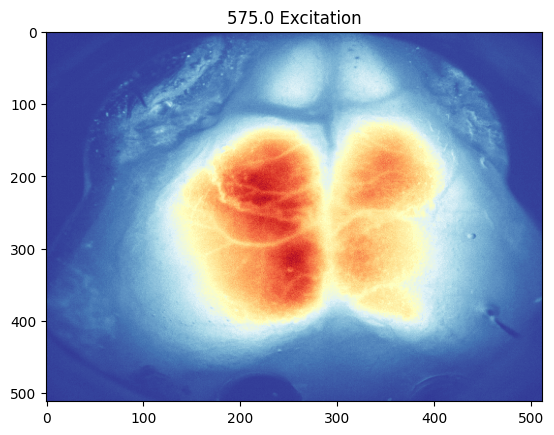

In [29]:
plt.imshow(photon_series_green_ex.data[10], aspect="auto", cmap="RdYlBu_r")
plt.title(f"{photon_series_green_ex.imaging_plane.excitation_lambda} Excitation")

# Access TTL Signals <a name="#ttl-signals"></a>

This section demonstrates how to access the TTL signals stored in the NWBFile.
TTLTypesTable contains the description and the id for each TTL signal
TTLsTable contains the respective timestamps (rising times)

In [9]:
import pandas as pd

events = pd.merge(
    left=nwbfile.acquisition["TTLsTable"][:],
    right=nwbfile.acquisition["TTLTypesTable"][:],
    left_on="ttl_type",
    right_on="id",
)
events.sort_values(by="ttl_type")
events.head()

timestamp  ttl_type        event_name  \
0    10.0512         0  TTLSignalBlueLED   
1    10.1512         0  TTLSignalBlueLED   
2    10.2512         0  TTLSignalBlueLED   
3    10.3512         0  TTLSignalBlueLED   
4    10.4512         0  TTLSignalBlueLED   

                           event_type_description  pulse_value  
0  The onset times of the TTLSignalBlueLED event.            1  
1  The onset times of the TTLSignalBlueLED event.            1  
2  The onset times of the TTLSignalBlueLED event.            1  
3  The onset times of the TTLSignalBlueLED event.            1  
4  The onset times of the TTLSignalBlueLED event.            1

# Access Wheel Signal <a name="#wheel-signal"></a>

This section demonstrates how to access the wheel velocity trace stored in the NWBFile.

In [10]:
wheel_signal = nwbfile.acquisition["WheelSignal"]
wheel_signal

WheelSignal pynwb.base.TimeSeries at 0x140291028906144
Fields:
  comments: no comments
  conversion: 0.000152587890625
  data: <HDF5 dataset "data": shape (100,), type "<i2">
  description: The WheelSignal measured over time.
  offset: 0.0
  rate: 5000.0
  resolution: -1.0
  starting_time: 0.0
  starting_time_unit: seconds
  unit: Volts

Text(0.5, 1.0, 'WheelSignal')

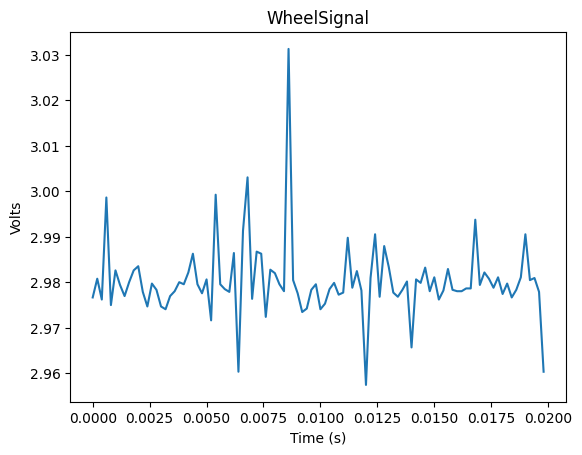

In [11]:
import numpy as np
timestamps = wheel_signal.get_timestamps()
plt.plot(timestamps,wheel_signal.data*wheel_signal.conversion)
plt.ylabel(wheel_signal.unit)
plt.xlabel("Time (s)")
plt.title(wheel_signal.name)

# Access Raw Behavior <a name="#raw-behavior"></a>

This section demonstrates how to access the raw behavioral video stored in the NWBFile.

In [12]:
video = nwbfile.acquisition["Video: 11222019_grabAM06_visual_stim"]
video

Video: 11222019_grabAM06_visual_stim pynwb.image.ImageSeries at 0x140291029660768
Fields:
  comments: no comments
  conversion: 1.0
  data: <HDF5 dataset "data": shape (0, 0, 0), type "|u1">
  description: Video recorded by camera.
  external_file: <StrDataset for HDF5 dataset "external_file": shape (1,), type "|O">
  format: external
  interval: 1
  offset: 0.0
  resolution: -1.0
  starting_frame: [0]
  timestamps: <HDF5 dataset "timestamps": shape (21506,), type "<f8">
  timestamps_unit: seconds
  unit: Frames

# Access Processed Behavior <a name="#processed-behavior"></a>

This section demonstrates how to access the Facemap output stored in the NWBFile.


In [13]:
nwbfile.processing["behavior"]["EyeTracking"]

EyeTracking pynwb.behavior.EyeTracking at 0x140291033408128
Fields:
  spatial_series: {
    eye_center_of_mass <class 'pynwb.behavior.SpatialSeries'>
  }

In [14]:
nwbfile.processing["behavior"]["PupilTracking"]

PupilTracking pynwb.behavior.PupilTracking at 0x140291032599568
Fields:
  time_series: {
    pupil_area <class 'pynwb.base.TimeSeries'>,
    pupil_area_raw <class 'pynwb.base.TimeSeries'>
  }

In [15]:
motion_svd_series = nwbfile.processing["behavior"]["MotionSVDSeriesROI1"]
motion_svd_series

MotionSVDSeriesROI1 abc.MotionSVDSeries at 0x140291032597408
Fields:
  comments: no comments
  conversion: 1.0
  data: <HDF5 dataset "data": shape (21506, 500), type "<f4">
  description: Motion SVD components for ROI1
  interval: 1
  motion_masks: motion_masks <class 'hdmf.common.table.DynamicTableRegion'>
  offset: 0.0
  resolution: -1.0
  timestamps: <HDF5 dataset "timestamps": shape (21506,), type "<f8">
  timestamps_unit: seconds
  unit: unknown

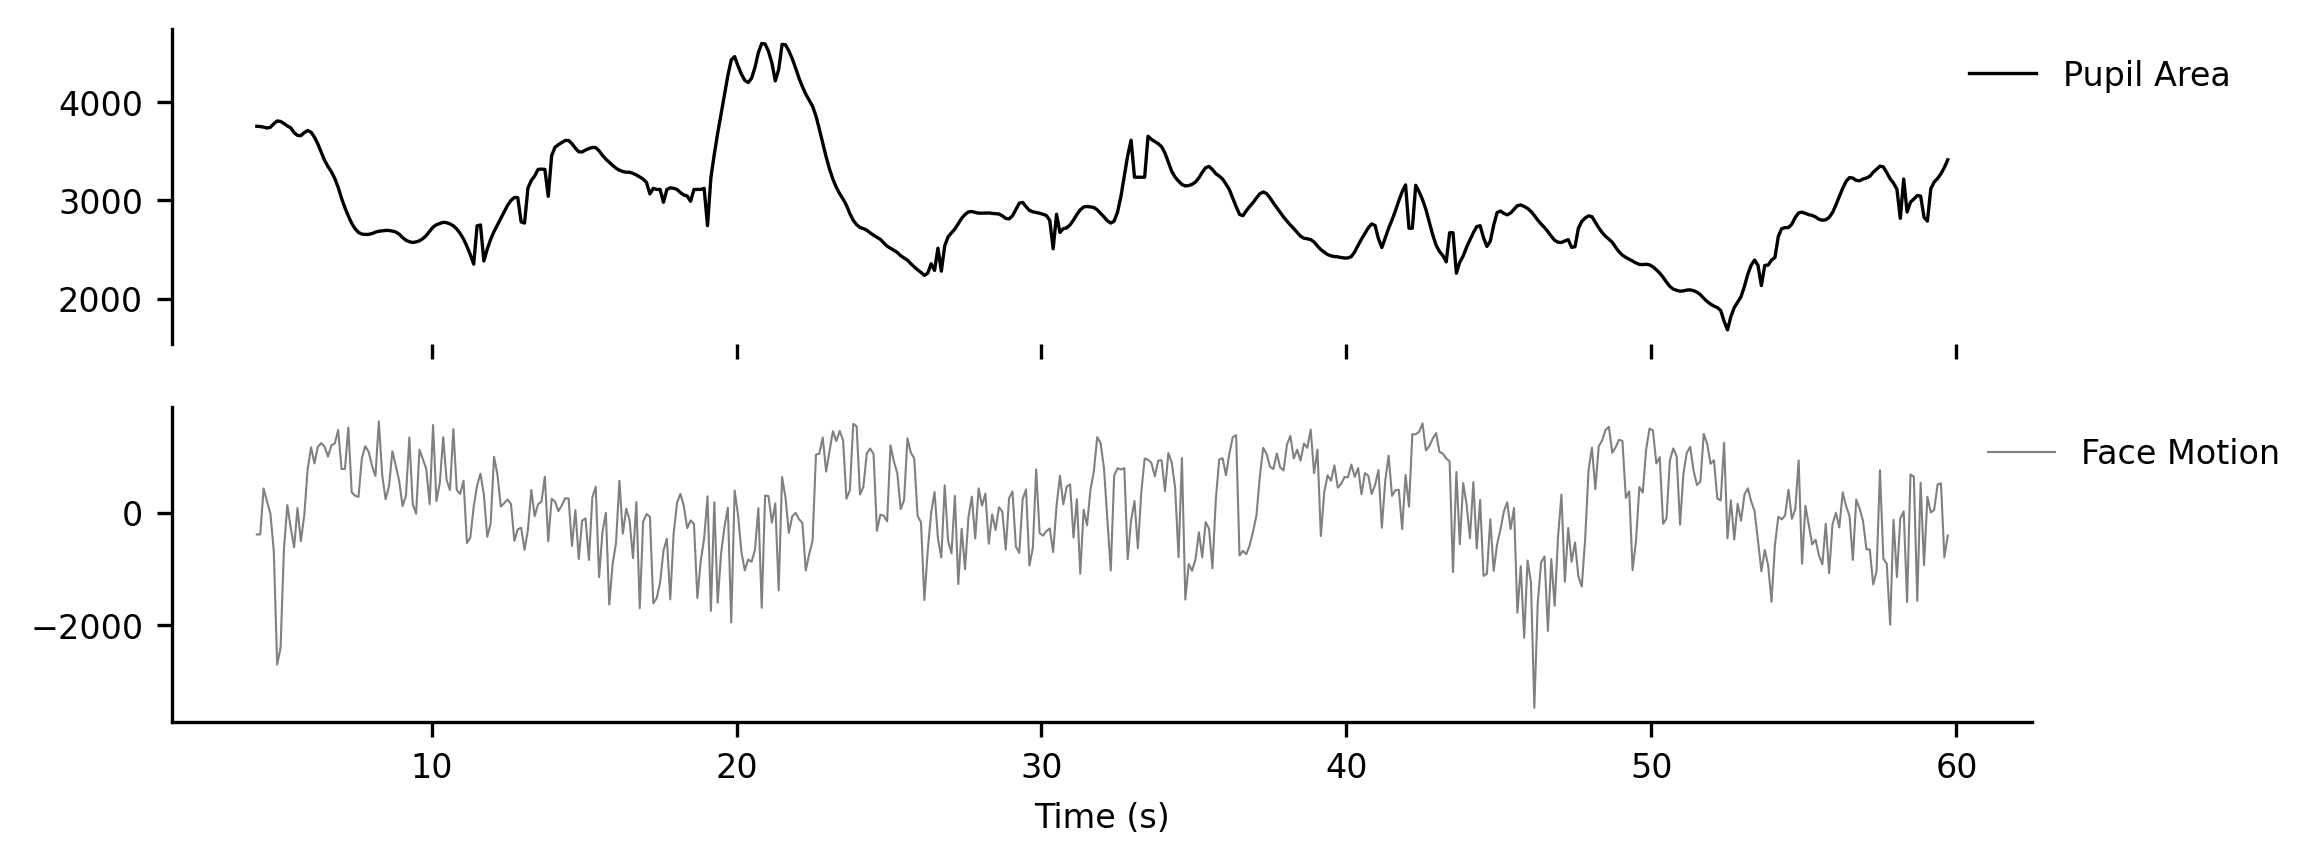

In [16]:
import pandas as pd
from matplotlib import pyplot as plt

# Prepare data for plotting
pupil_area = nwbfile.processing["behavior"]["PupilTracking"]["pupil_area"]
timestamps = pupil_area.get_timestamps()

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(8, 3), dpi=300, sharex=True)

# Plot data
ax[0].plot(timestamps[:500], pupil_area.data[:500,0], color="black", linewidth=0.8, label='Pupil Area')

# Plot control data with offset
ax[1].plot(timestamps[:500], motion_svd_series.data[:500,0], color="grey", linewidth=0.5, label='Face Motion')

ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].spines['bottom'].set_visible(False)
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)

ax[0].legend(["Pupil Area"], frameon=False, bbox_to_anchor=(.95, 1), loc='upper left', prop={'size': 8})
ax[1].legend(["Face Motion"], frameon=False, bbox_to_anchor=(.96, 1), loc='upper left', prop={'size': 8})
ax[1].tick_params(axis='y', labelsize=8)
ax[0].tick_params(axis='y', labelsize=8)


plt.xlabel('Time (s)', fontsize=8)
plt.tick_params(axis='x', labelsize=8)
plt.show()

In [17]:
motion_svd_masks = nwbfile.processing["behavior"]["MotionSVDMasksROI1"]
motion_svd_masks

MotionSVDMasksROI1 abc.MotionSVDMasks at 0x140291032597696
Fields:
  colnames: ['image_mask']
  columns: (
    image_mask_index <class 'hdmf.common.table.VectorIndex'>,
    image_mask <class 'hdmf.common.table.VectorData'>
  )
  description: Motion masks for ROI1
  downsampling_factor: 4.0
  id: id <class 'hdmf.common.table.ElementIdentifiers'>
  mask_coordinates: <HDF5 dataset "mask_coordinates": shape (4,), type "<i8">
  processed_frame_dimension: <HDF5 dataset "processed_frame_dimension": shape (2,), type "<i8">

In [18]:
motion_svd_masks.mask_coordinates[:]

array([ 92, 131, 208, 275])

In [19]:
motion_svd_masks.processed_frame_dimension[:]

array([295, 288])

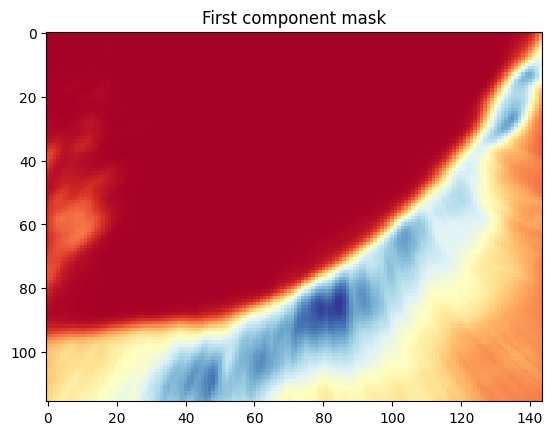

In [20]:
mask = motion_svd_masks.image_mask_index[0]
plt.imshow(mask, aspect="auto", cmap="RdYlBu_r" )
plt.title("First component mask")
plt.show()

# Access Visual Stimulus <a name="access-visualstim"></a>

This section demonstrates how to access the visual stimulus data.

In [32]:
visual_stimulus_table = nwbfile.intervals["VisualStimulus"].to_dataframe()
visual_stimulus_table.head()

start_time  stop_time  contrast  orientation  stimulus_frequency  \
id                                                                     
0     17.13926   18.89166       100            0                   2   
1     28.98906   30.99146         5            0                   2   
2     36.02226   38.04146        50            0                   2   
3     43.07226   45.07466        50            0                   2   
4     50.10546   52.10786        20            0                   2   

    spatial_frequency  stimulus_size              screen_coordinates  
id                                                                    
0                0.04              2  [20.0, 667.97, 317.97, 932.03]  
1                0.04              2  [20.0, 667.97, 317.97, 932.03]  
2                0.04              2  [20.0, 667.97, 317.97, 932.03]  
3                0.04              2  [20.0, 667.97, 317.97, 932.03]  
4                0.04              2  [20.0, 667.97, 317.97, 932.03]